# Ejercicion de programación - Regresión Logistica

En este ejercicio se implementa regresion logistica y se aplica a dos diferentes datasets.

In [1]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

## 1 Regresion Logistica

En esta parte del ejercicio, creará un modelo de regresión logística para predecir si un estudiante será admitido en una universidad. Suponga que es el administrador de un departamento universitario y desea determinar las posibilidades de admisión de cada solicitante en función de sus resultados en dos exámenes. Tiene datos históricos de solicitantes anteriores que puede usar como un conjunto de capacitación para la regresión logística. Para cada ejemplo de capacitación, se tiene las calificaciones del solicitante en dos exámenes y la decisión de admisión. Su tarea es crear un modelo de clasificación que calcule la probabilidad de admisión de un solicitante en función de los puntajes de esos dos exámenes.

La siguiente celda cargará los datos y las etiquetas correspondientes:

In [2]:
# Cargar datos
# Las dos primeras columnas contienen la nota de dos examenes y la tercera columna
# 
data = np.loadtxt('/content/LibroDATACC.csv', delimiter=';')
X, y = data[:, :15], data[:, 15]
print(X.shape)
print(y.shape)
print(y)

(277, 15)
(277,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 1.1 Visualizar los datos

Antes de comenzar a implementar cualquier algoritmo de aprendizaje, siempre es bueno visualizar los datos si es posible. Mostramos los datos en una gráfica bidimensional llamando a la función `plotData`. Se completará el código en `plotData` para que muestre una figura donde los ejes son los dos puntajes de los dos examenes, los ejemplos positivos y negativos se muestran con diferentes marcadores.

In [3]:
X.shape

(277, 15)

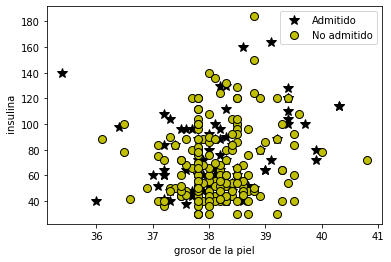

In [5]:
def plotData(X, y):
    fig = pyplot.figure()
    pos = y == 1
    neg = y == 0
    pyplot.plot(X[pos, 3], X[pos, 4], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 3], X[neg, 4], 'ko', mfc='y', ms=8, mec='k', mew=1)
plotData(X, y)
# adiciona etiquetas para los ejes
pyplot.xlabel('frecuencia')
pyplot.ylabel(' temperatura')
pyplot.legend(['Admitido', 'No admitido'])
pass

Se llama a la función implementada para mostrar los datos cargados:

In [6]:
###---> normalizacion de los datos  entre 0  y  1  sacando la medi ay la estandar
def  normalizacion(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [7]:
##--> aqui estamos llamando a la funcion de normalizacion
X_norm, mu, sigma = normalizacion(X)
print(X_norm.shape)

(277, 15)


<a id="section1"></a>
### 1.2 Implementacion

#### 1.2.1 Fución Sigmoidea

La hipotesis para la regresión logistica se define como:

$$ h_\theta(x) = g(\theta^T x)$$

donde la función $g$ is la función sigmoidea. La función sigmoidea se define como: 

$$g(z) = \frac{1}{1+e^{-z}}$$.

Los resultados que debe generar la funcion sigmoidea para valores positivos amplios de `x`, deben ser cercanos a 1, mientras que para valores negativos grandes, la sigmoide debe generar valores cercanos 0. La evaluacion de `sigmoid(0)` debe dar un resultado exacto de 0.5. Esta funcion tambien debe poder trabajar con vectores y matrices.

In [8]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)
  
    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. RE recomienda experimentar con otros valores de `z`.

In [9]:
# Prueba la implementacion de la funcion sigmoid
z = (21)
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 21 ) =  0.9999999992417439


<a id="section2"></a>
#### 1.2.2 Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X. 

In [10]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción. 
m, n = X.shape

# ---> estamos conatenando aumentando 1 a la columna 0

X_norm = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

La funcion de costo en una regresión logistica es:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

y el gradiente del costo es un vector de la misma longitud como $\theta$ donde el elemento $j^{th}$ (para $j = 0, 1, \cdots , n$) se define como:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Si bien este gradiente parece idéntico al gradiente de regresión lineal, la fórmula es diferente porque la regresión lineal y logística tienen diferentes definiciones de $h_\theta(x)$.
<a id="costFunction"></a>

In [11]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    
    return J

In [12]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
       
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-0.88279472  0.39361312  0.24834672 -0.2477391  -0.11255714  0.14468139
  0.20322145 -0.20570698  0.03345467 -0.03573982  0.27211223  0.33307521
 -0.20788277 -0.07619452 -0.04245433 -0.4654625 ]


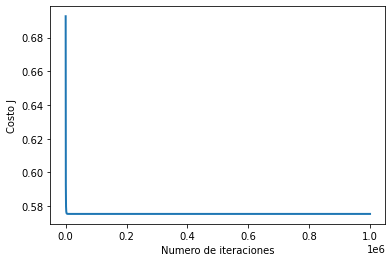

In [17]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 1000000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(16)
theta, J_history = descensoGradiente(theta, X_norm, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))


In [21]:
# verificar si tienes tiene la enfermedad                   en la Y prueva SI tiene
X_array = [1, 2,1,528904,38.2,96,60,3,4,1,4,60,6,2,1,4205]
X_array[1:16] = (X_array[1:16] - mu) / sigma
tiene_o_no = sigmoid(np.dot(X_array, theta)) 

print(f"Tiene o no la enfermedad con el descenso por el gradiente) probabilidad :{tiene_o_no}")

Tiene o no la enfermedad con el descenso por el gradiente) probabilidad :0.716621946014045


In [ ]:
## ---> lo que te esta imprimiento  o.7166..... eso el la probabilidad que te esta dando 
##----> a partir de 0.50 para arri ya lo toma como 1  y el resto lo toma como cero 
##----> asi qeu tu dices --------- esta es la probilidad con estos datos de prueva 

In [22]:
# verificar si tienes tiene la enfermedad                            en la Y prueva NO tiene
X_array = [1,1,1,535196,37.3,90,40,3,3,2,1,65,50,3,1,3205]
X_array[1:16] = (X_array[1:16] - mu) / sigma
tiene_o_no = sigmoid(np.dot(X_array, theta)) 
print(f"Tiene o no la enfermedad con el descenso por el gradiente) probabilidad :{tiene_o_no}")

Tiene o no la enfermedad con el descenso por el gradiente) probabilidad :0.2871250234565606


In [31]:
# verificar si tienes tiene la enfermedad en la Y prueva si tiene
X_array = [1,1,1,529427,37.2,60,42,2,3,2,4,43,6.6,1,1,2209]
X_array[1:16] = (X_array[1:16] - mu) / sigma
tiene_o_no = sigmoid(np.dot(X_array, theta)) 
print(f"Tiene o no la enfermedad con el descenso por el gradiente) probabilidad :{tiene_o_no}")

Tiene o no la enfermedad con el descenso por el gradiente) probabilidad :0.4339337552441808


In [32]:
# verificar si tienes tiene la enfermedad en la Y prueva NO tiene
X_array = [1,1,1,5262541,37.4,50,32,3,1,2,1,45,7.9,1,1,2208]
X_array[1:16] = (X_array[1:16] - mu) / sigma
tiene_o_no = sigmoid(np.dot(X_array, theta)) 
print(f"Tiene o no la enfermedad con el descenso por el gradiente) probabilidad :{tiene_o_no}")

Tiene o no la enfermedad con el descenso por el gradiente) probabilidad :0.10846576449314567


In [33]:
# verificar si tienes tiene la enfermedad en la Y prueva SI tiene
X_array = [1,1,1,528469,38.1,52,24,1,1,2,1,54,7.5,2,1,2112]
X_array[1:16] = (X_array[1:16] - mu) / sigma
tiene_o_no = sigmoid(np.dot(X_array, theta)) 
print(f"Tiene o no la enfermedad con el descenso por el gradiente) probabilidad :{tiene_o_no}")

Tiene o no la enfermedad con el descenso por el gradiente) probabilidad :0.28596701039655414


In [34]:
# verificar si tienes tiene la enfermedad en la Y prueva NO tiene
X_array = [1,2,1,528620,36.9,50,40,2,2,3,1,37.5,6.5,1,2,3111]
X_array[1:16] = (X_array[1:16] - mu) / sigma
tiene_o_no = sigmoid(np.dot(X_array, theta)) 
print(f"Tiene o no la enfermedad con el descenso por el gradiente) probabilidad :{tiene_o_no}")

Tiene o no la enfermedad con el descenso por el gradiente) probabilidad :0.37064336700977685


In [23]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)
    
    return J, grad

Se prueba la funcion `costFunction` utilizando dos casos de prueba para $\theta$.

Una vez que se completa `optimize.minimize`, se usa el valor final de $\theta$ para visualizar el límite de decisión en los datos de entrenamiento.

Para hacerlo, se implementa la función `plotDecisionBoundary` para trazar el límite de decisión sobre los datos de entrenamiento.

<a id="section4"></a>
#### 1.2.4 Evaluación de la regresión logistica

Después de aprender los parámetros, se puede usar el modelo para predecir si un estudiante en particular será admitido. Para un estudiante con una puntuación en el Examen 1 de 45 y una puntuación en el Examen 2 de 85, debe esperar ver una probabilidad de admisión de 0,776. Otra forma de evaluar la calidad de los parámetros que hemos encontrado es ver qué tan bien predice el modelo aprendido en nuestro conjunto de entrenamiento. 

In [26]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).
    
    X : array_like
        Datos utilizados para el calculo de las predicciones. 
        La fila es el numero de los puntos para calcular las predicciones, 
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X. 
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

Una vez entrenado el modelo se procede a realizar la prediccion y evaluación de los resultados de predecir cual es el valor que vota el modelo para todos los datos utilizados en el entrenamiento.

In [29]:
from IPython.core.display import ProgressBar
#  Predice la probabilidad de ingreso para un estudiante con nota de 45 en el examen 1 y nota de 85 en el examen 2
X_array = [1,1,1,535196,37.3,90,40,3,3,2,1,65,50,3,1,3205]

X_array[1:16] = (X_array[1:16] - mu) / sigma
prob = sigmoid(np.dot(X_array, theta)) 
print('Para probabilidad de admisión de: {:.3f}%'.format(prob))
print('---------------------------')

# Compute accuracy on our training set
p = predict(theta, X_norm)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
print('Precisión esperada (aproximadamente): 89.00 %')

Para probabilidad de admisión de: 0.287%
---------------------------
Precisión de entrenamiento: 70.04 %
Precisión esperada (aproximadamente): 89.00 %
